In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 读入数据集
iris = load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

In [2]:
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape,y_train.shape

((105, 4), (105,))

In [3]:
# 训练XGBoost模型
model = xgb.XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

np.argsort() 是 NumPy 库中的一个函数，用于返回排序后数组中元素的索引，而不是元素本身

import numpy as np

arr = np.array([3, 1, 4, 2])

idx = np.argsort(arr)

print(idx)

输出为： [1 3 0 2]。

这表示原始数组排序后，元素1的索引为1，元素2的索引为3，元素3的索引为0，元素4的索引为2。
[::-1] 表示将排序后的数组倒序排列，即按照从大到小的顺序排列

In [4]:
import numpy as np

arr = np.array([3, 1, 4, 2])

idx = np.argsort(arr)
print(idx)
print(idx[::-1])

[1 3 0 2]
[2 0 3 1]


In [5]:
# 特征重要性排序
importance = model.feature_importances_  # array([0.01012843, 0.0303854 , 0.73876214, 0.220724  ], dtype=float32)
indices = np.argsort(importance)[::-1]  # array([2, 3, 1, 0], dtype=int64)  [::-1]表示倒叙

# 打印每个特征的重要性得分
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importance[indices[f]]))
# X.shape[1]

1. feature 2 (0.738762)
2. feature 3 (0.220724)
3. feature 1 (0.030385)
4. feature 0 (0.010128)


4

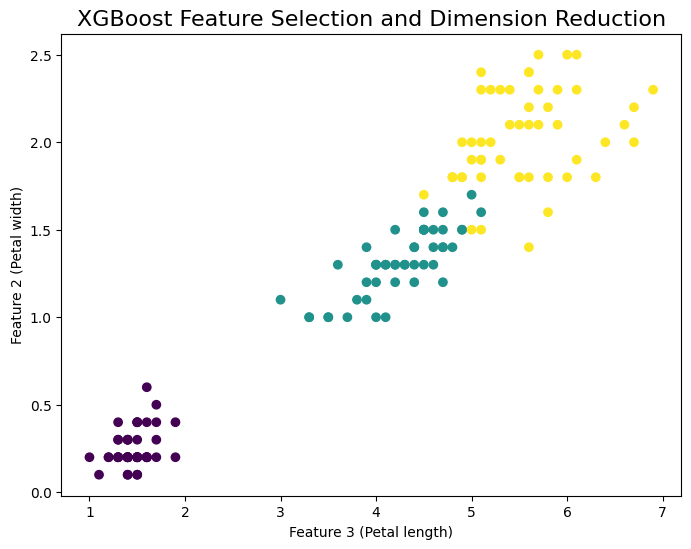

In [6]:
# 取前两个重要特征
X_selected = X[:, indices[:2]]

# 训练XGBoost模型并预测
model.fit(X_selected, y)
y_pred = model.predict(X_selected)

# 可视化
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('Feature 3 (Petal length)')
plt.ylabel('Feature 2 (Petal width)')
plt.title('XGBoost Feature Selection and Dimension Reduction', fontsize=16)
plt.show()


In [11]:
# indices
indices[:2]

array([2, 3], dtype=int64)

In [8]:
importance

array([0.01012843, 0.0303854 , 0.73876214, 0.220724  ], dtype=float32)

In [12]:
np.argsort(importance)[::-1]

array([2, 3, 1, 0], dtype=int64)

In [15]:
y_pred == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

E:\anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


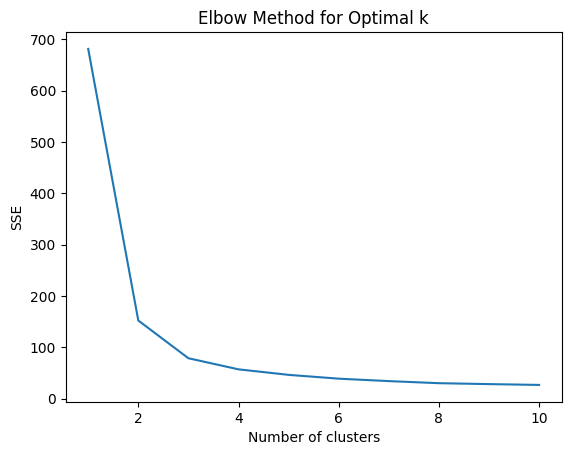

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()
